#Credit Card Detector

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

I will use various predictive models to determine how accurate they are in detecting if a transaction is a regular payment or it is fraudulent. The features in this dataset are scaled and the names of the features in the data are not displayed due to privacy reasons.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
#Load Dataset
df = pd.read_csv("C:\\Users\\Efemena Ikpro\\OneDrive\\Desktop\\Online programmes\\Python\\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Extracting only columns with null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [8]:
#Investigating the label of the data
print(round(df["Class"].value_counts()[0]/len(df) * 100,2), "% of the data are not fraudulent transactions")
print(round(df["Class"].value_counts()[1]/len(df) * 100,2), "% of the data are fraudulent")

#The dataset is quite unbalanced with 99% of the data as not fraudulent while less than 1% is Fraudulent. We cannot use this to train as it will be very baised 

99.83 % of the data are not fraudulent transactions
0.17 % of the data are fraudulent


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

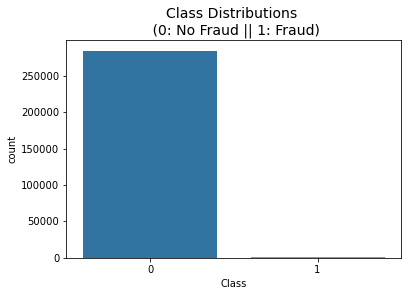

In [9]:
#Visualization of the label
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

There are several ways to approach this classification problem taking into consideration this unbalance.

- Collect more data? Nice strategy but not applicable in this case
- Changing the performance metric:
- Use the confusion matrix to calculate Precision, Recall
- F1score (weighted average of precision recall)
- Use Kappa - which is a classification accuracy normalized by the imbalance of the classes in the data
- ROC curves - calculates sensitivity/specificity ratio.

Resampling the dataset
- Essentially this is a method that will process the data to have an approximate 50-50 ratio.
- One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
- Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)

C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


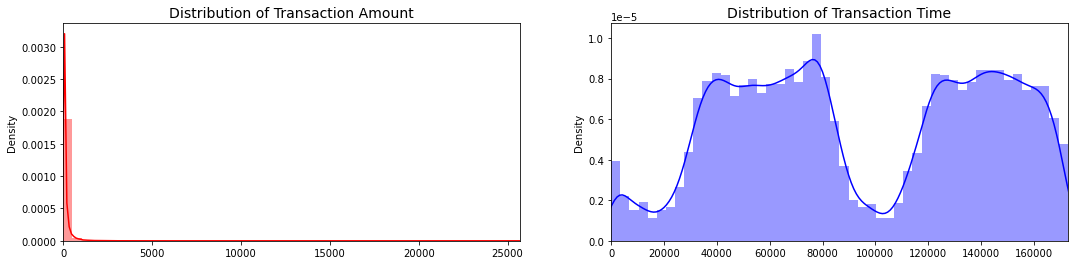

In [10]:
#Visualize the distribution of Time and transaction amount to figure out how skewed the features are. 
fig, ax = plt.subplots(1,2, figsize = (18,4))

amt = df["Amount"].values
tym = df["Time"].values

sns.distplot(amt, ax=ax[0], color = "r")
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amt), max(amt)])

sns.distplot(tym, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(tym), max(tym)])

plt.show()

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step\

#Most of the data are scaled already - (V1/V28)

#Scaling and Distributing
- Firstly, we will scale the columns (Time and Amount). 
- Secondly, We will have to create a sub-sample of thye data to have an equal amout of Fraudulent/non-fraudulent transactions which will help the algorithm better understand patterns

#Sub-Sample
- This will create a dataframe with a ratio of 50/50 ratio of fraud and non-fraud transactions
This is done to avoid -OVERFITTING and WRONG CORRELATIONS

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1.
#Normalization: shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
#Robust Scaler: similar to normalization but it instead uses the interquartile range, so that it is robust to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

#create a new column for scaled time/amount columns
df["Scaled_amt"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Scaled_time"] = rob_scaler.fit_transform(df["Time"].values.reshape(-1,1))

scaled_amt = df["Scaled_amt"]
scaled_time = df["Scaled_time"]

df.drop(["Time", "Amount", "Scaled_amt", "Scaled_time"], axis=1, inplace=True)

df.insert(0, "scaled_amt", scaled_amt)
df.insert(1, "scaled_time", scaled_time)

df.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
#Splitting the Data - (Original Dataframe)
#I am going to perform Random Undersampling and Oversampling to test the models on the original dataset and noy the testing set creating during sampling

data = df.copy()

print(round(df["Class"].value_counts()[0]/len(df) * 100,2), "% of the data are not fraudulent transactions")
print(round(df["Class"].value_counts()[1]/len(df) * 100,2), "% of the data are fraudulent")

#drop the label
y = df["Class"]
x = df.drop("Class", axis=1)

sample = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sample.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

99.83 % of the data are not fraudulent transactions
0.17 % of the data are fraudulent
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [13]:
#Random Under-Sampling
#This basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

print("Non-Fraud transactions = ", df["Class"].value_counts()[0])
print("Fraud transactions = ", df["Class"].value_counts()[1])
print("----------------------------------------")

df = df.sample(frac=1)

#Amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

print("Result from random undersampling")
print("Non-Fraud transactions = ", new_df["Class"].value_counts()[0])
print("Fraud transactions = ", new_df["Class"].value_counts()[1])

Non-Fraud transactions =  284315
Fraud transactions =  492
----------------------------------------
Result from random undersampling
Non-Fraud transactions =  492
Fraud transactions =  492


In [20]:
new_df.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
55268,-0.181793,-0.444519,-1.619797,0.705403,2.165168,-1.644137,-1.890364,-0.765768,-1.119819,0.914613,...,0.064422,0.568150,1.363130,-0.233739,0.769271,0.419604,-0.140352,-0.046000,-0.017746,0
183106,-0.307413,0.481279,0.224414,2.994499,-3.432458,3.986519,3.760233,0.165640,1.099378,-0.654557,...,-0.200846,0.491337,-0.984223,-0.421979,-1.048058,0.726412,0.268625,0.283689,0.419102,1
246349,-0.154545,0.804098,1.929345,-0.488062,-0.363368,0.304495,-0.503281,0.190784,-0.781089,0.210816,...,-0.194865,0.246356,0.889861,0.153527,0.724588,-0.132391,-0.262964,0.034996,-0.039826,0
6529,-0.293440,-0.902278,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,...,0.315957,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1
234705,-0.307413,0.744628,-2.219219,0.727831,-5.458230,5.924850,3.932464,-3.085984,-1.677870,0.865075,...,0.964772,0.417472,-0.817343,-0.028752,0.025723,-0.825835,-0.013089,0.413291,-0.131387,1


C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


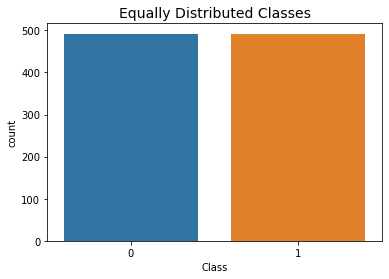

In [14]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<AxesSubplot:>

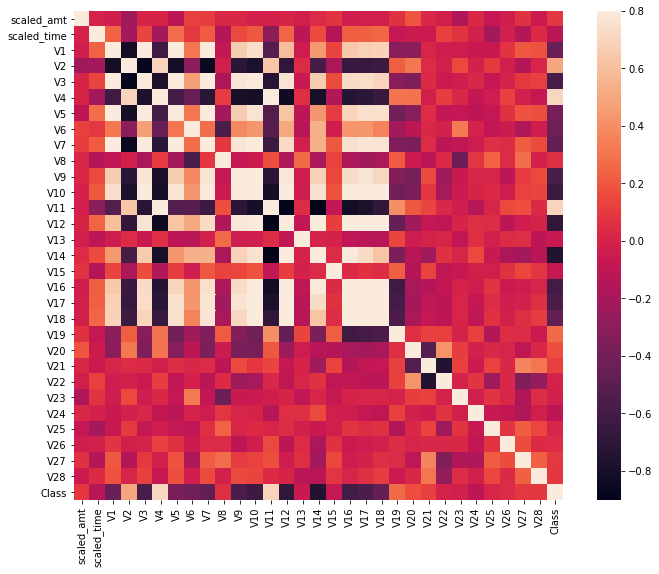

In [15]:
#Correlation between Class and other variables in the dataset
a = new_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(a, vmax=.8, square=True)

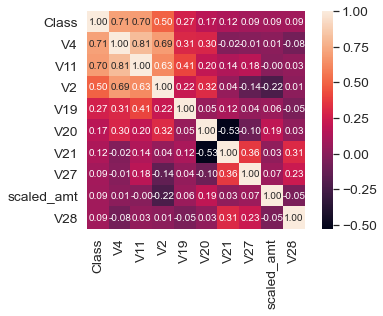

In [16]:
#Top 10 Correlation in the dataset

num = 10 #er of variable in the heatmap
cols = a.nlargest(num, "Class")["Class"].index
cm = np.corrcoef(new_df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

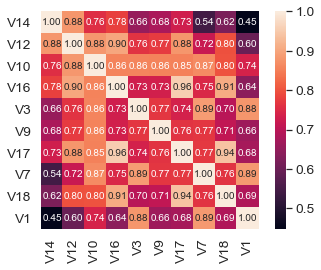

In [17]:
#Bottom 10 Correlation in the dataset

num = 10 #Number of variable in the heatmap
cols = a.nsmallest(num, "Class")["Class"].index
cm = np.corrcoef(new_df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [18]:
#Model Application
#Simple and efficient tools for predictive data analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [19]:
#8 Machine learning  Algorithms will be applied to the dataset
classifiers = [[XGBClassifier(),'XGB Classifier'], 
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(),'SGD Classifier'], 
               [SVC(),'SVC'],
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decison tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [23]:
df_1 = new_df.drop("Class", axis=1)
label = new_df["Class"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_df, label, test_size=0.2)

score_list = {}
cross_val_list = {}
roc_auc_list = {}
accuracy_score_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    acuracy = accuracy_score(y_test, pred)
    
    score_list[model_name] = ([str(round(score*100, 2)) + '%'])
    cross_val_list[model_name] = ([str(round(cross_val*100, 2)) + '%'])
    roc_auc_list[model_name] = ([str(round(roc_auc*100, 2)) + '%'])
    accuracy_score_list[model_name] = ([str(round(acuracy*100, 2)) + '%'])
   
    if model_name != classifiers[-1][1]:
       print('')

C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Efemena Ikpro\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [27]:
print("Accuracy Score")
sl = pd.DataFrame(score_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,100.0%,92.39%,95.94%,92.39%,100.0%,100.0%,99.49%


In [28]:
print("Cross Validation")
sl = pd.DataFrame(cross_val_list)
sl.head()

Cross Validation


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,98.97%,91.87%,94.41%,91.86%,100.0%,100.0%,95.94%


In [29]:
print("roc_auc_list")
sl = pd.DataFrame(roc_auc_list)
sl.head()

roc_auc_list


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,100.0%,100.0%,91.94%,95.76%,91.94%,100.0%,100.0%,99.46%


TypeError: plot_confusion_matrix() got an unexpected keyword argument 'classes'

<Figure size 432x288 with 0 Axes>